In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploring Data

In [6]:
import pandas as pd

In [7]:
data=pd.read_csv('/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv')

In [3]:
data.sample(10)

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
257,257,Southern,Andhra Pradesh,Puttaparthi,Prasanthi Nilayam,Spiritual Center,1950,1.0,4.7,0,Yes,NaN,Religious,Yes,0.120,All
298,298,Eastern,Bihar,Bodh Gaya,Mahabodhi Temple,Temple,-260,1.5,4.7,0,Yes,NaN,Religious,Yes,0.200,All
74,74,Western,Gujarat,Gandhinagar,Dandi Kutir,Museum,2013,1.5,4.5,0,No,NaN,Historical,Yes,0.050,All
179,179,Northern,Uttarakhand,Chopta,Tungnath Temple,Temple,751,2.0,4.8,0,No,NaN,Religious,No,0.090,All
185,185,Central,Uttar Pradesh,Ayodhya,Ram Janmabhoomi,Religious Site,Unknown,1.0,4.8,0,Yes,NaN,Religious,No,0.025,All
13,13,Northern,Delhi,Delhi,National Zoological Park,Zoo,1959,3.0,4.1,80,Yes,Friday,Environmental,Yes,0.410,All
226,226,Eastern,Odisha,Konark,Sun Temple,Temple,1250,1.5,4.7,40,Yes,NaN,Historical,Yes,0.830,All
254,254,Southern,Andhra Pradesh,Amravati,Amaravathi Temple,Temple,Unknown,1.0,4.7,0,Yes,NaN,Religious,No,0.041,All
218,218,Eastern,West Bengal,Digha,Digha Beach,Beach,Unknown,1.5,4.5,0,No,NaN,Recreational,Yes,0.090,Morning
319,319,North Eastern,Meghalaya,Cherrapunji,Living Root Bridge,Natural Feature,Unknown,2.0,4.6,0,No,NaN,Nature,Yes,0.060,Morning


In [4]:
data.columns

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

In [5]:
data.head(5)

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [6]:
data['Name'].value_counts()

Name
City Palace                  2
Ramanathaswamy Temple        2
Wonderla Amusement Park      2
Thiksey Monastery            2
Vivekananda Rock Memorial    1
                            ..
Kovalam Beach                1
Bekal Fort                   1
Varkala Beach                1
Kumarakom Bird Sanctuary     1
Albert Hall Museum           1
Name: count, Length: 321, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 
 12  Signific

In [13]:
data.describe()

,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,162.000000,1.807692,4.486154,115.809231,0.408438
std,93.963645,0.971398,0.274580,530.859785,0.646668
min,0.000000,0.500000,1.400000,0.000000,0.010000
25%,81.000000,1.000000,4.400000,0.000000,0.059000
50%,162.000000,1.500000,4.500000,0.000000,0.170000
75%,243.000000,2.000000,4.600000,40.000000,0.500000
max,324.000000,7.000000,4.900000,7500.000000,7.400000


In [14]:
data.isnull().sum()

Unnamed: 0                            0
Zone                                  0
State                                 0
City                                  0
Name                                  0
Type                                  0
Establishment Year                    0
time needed to visit in hrs           0
Google review rating                  0
Entrance Fee in INR                   0
Airport with 50km Radius              0
Weekly Off                          293
Significance                          0
DSLR Allowed                          0
Number of google review in lakhs      0
Best Time to visit                    0
dtype: int64

In [16]:
data['Weekly Off'].value_counts()

Weekly Off
Monday     23
Friday      5
Sunday      2
Yes         1
Tuesday     1
Name: count, dtype: int64

In [17]:
data['Weekly Off'].fillna('NAN', inplace = True)

/tmp/ipykernel_24/1897959233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weekly Off'].fillna('NAN', inplace = True)


In [21]:
data.drop('Unnamed: 0', axis = 1,inplace=True)

In [22]:
data.isnull().sum()

Zone                                0
State                               0
City                                0
Name                                0
Type                                0
Establishment Year                  0
time needed to visit in hrs         0
Google review rating                0
Entrance Fee in INR                 0
Airport with 50km Radius            0
Weekly Off                          0
Significance                        0
DSLR Allowed                        0
Number of google review in lakhs    0
Best Time to visit                  0
dtype: int64

# Visualization


In [2]:

import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

**1. Which is the state with most visiting places?**

<Axes: xlabel='count', ylabel='State'>

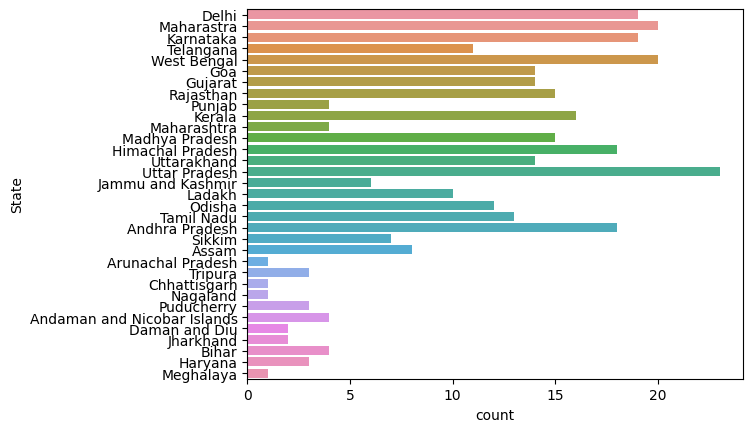

In [24]:
sns.countplot(y='State', data =data)

**2. What are the top 5 google rated visiting place types?**

In [25]:
data.columns

Index(['Zone', 'State', 'City', 'Name', 'Type', 'Establishment Year',
       'time needed to visit in hrs', 'Google review rating',
       'Entrance Fee in INR', 'Airport with 50km Radius', 'Weekly Off',
       'Significance', 'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

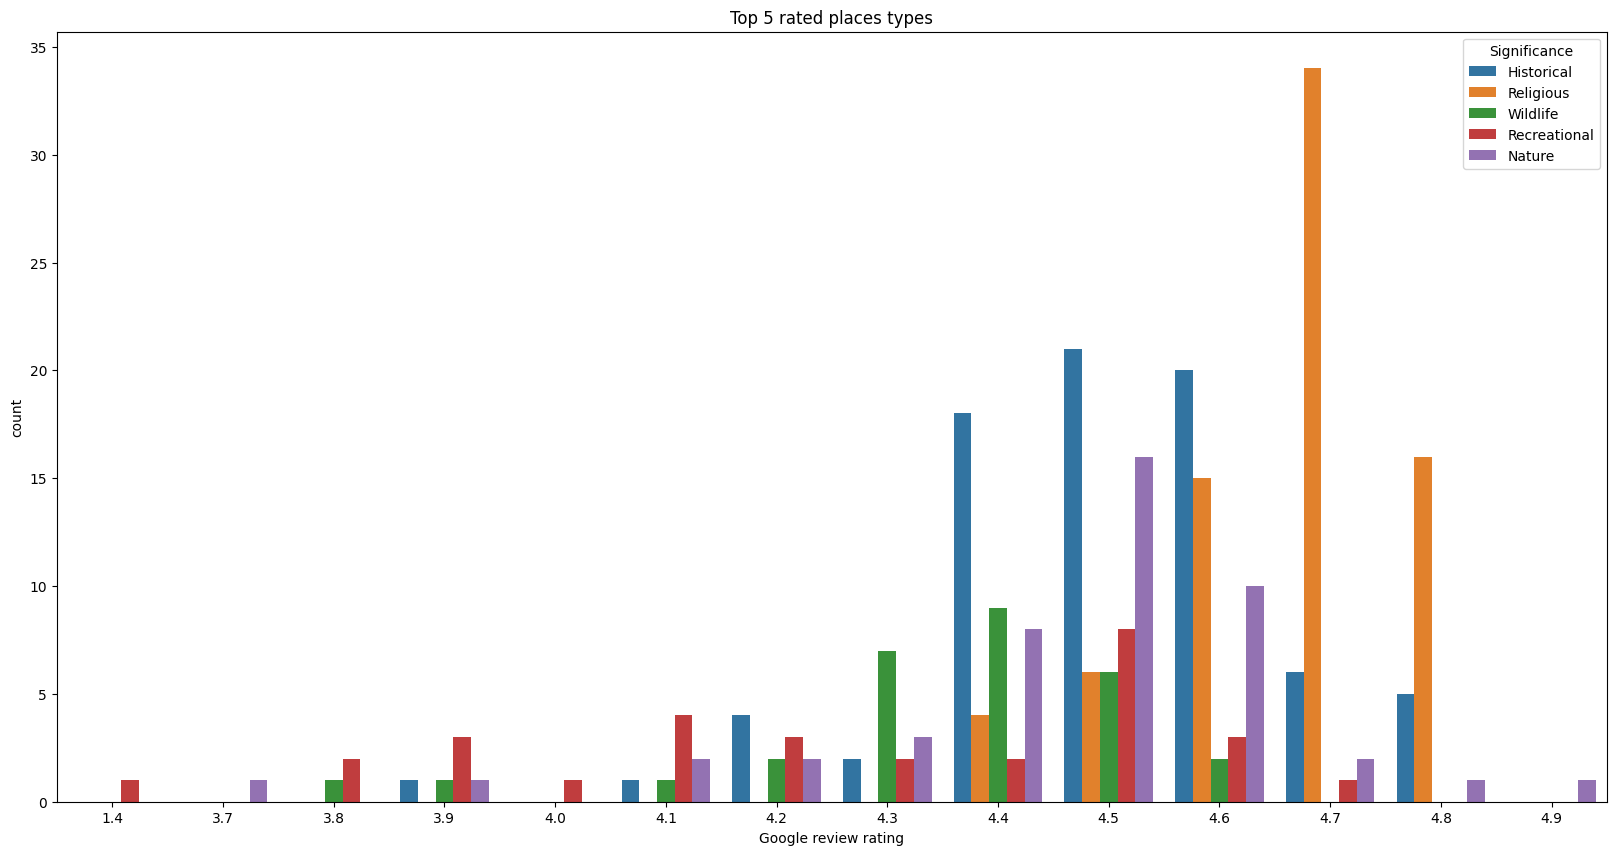

In [39]:
top_5=data['Significance'].value_counts().head(5).index
top_5_rating_places = data[data['Significance'].isin(top_5)]

plt.figure(figsize = (20,10))
sns.countplot(x='Google review rating',hue ='Significance' ,data= top_5_rating_places)
plt.title('Top 5 rated places types')
plt.show()

**3. What are the best time to visit places?**

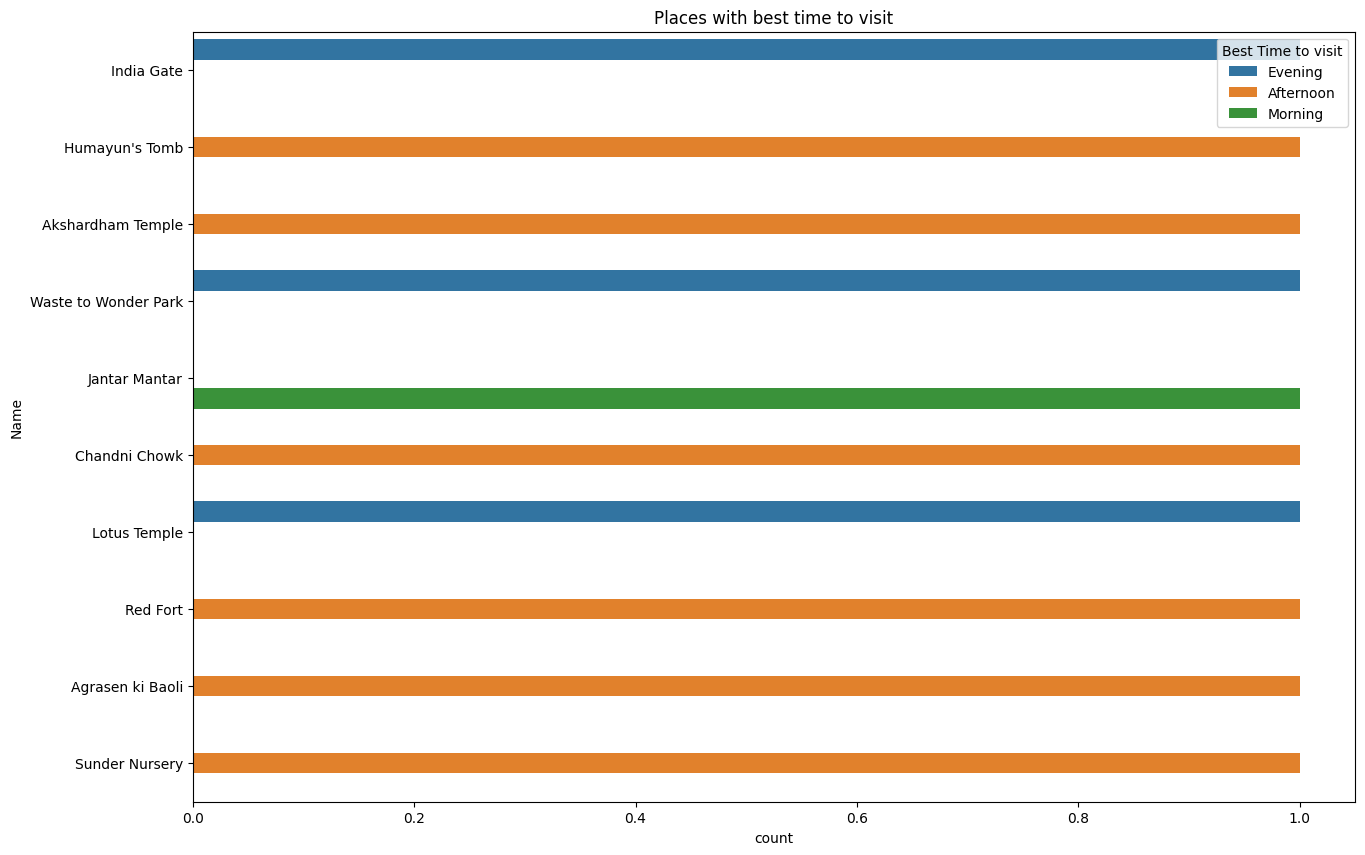

In [12]:
top_5_cities = data['Name'].head(10).values
top_5_city_data =data[data['Name'].isin(top_5_cities)]
plt.figure(figsize=(15,10))
sns.countplot(y='Name' ,hue='Best Time to visit', data=top_5_city_data)
plt.title('Places with best time to visit')
plt.show()



**4. What are the types of visiting places that permits DSLR?**

<Axes: xlabel='count', ylabel='Significance'>

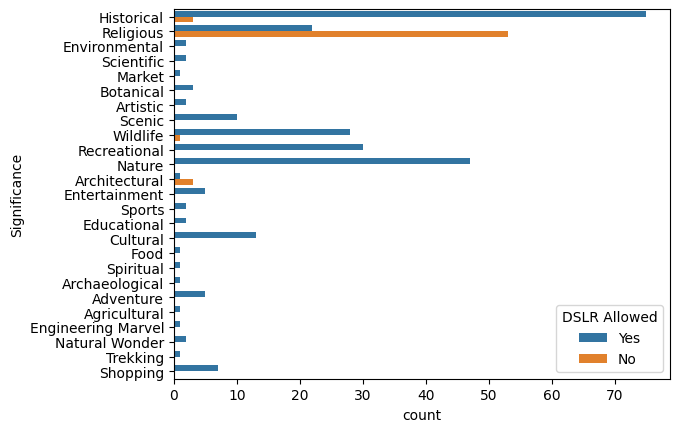

In [8]:
sns.countplot(y='Significance', hue ='DSLR Allowed', data=data)

**5. What is the time required to visit different types of places?**

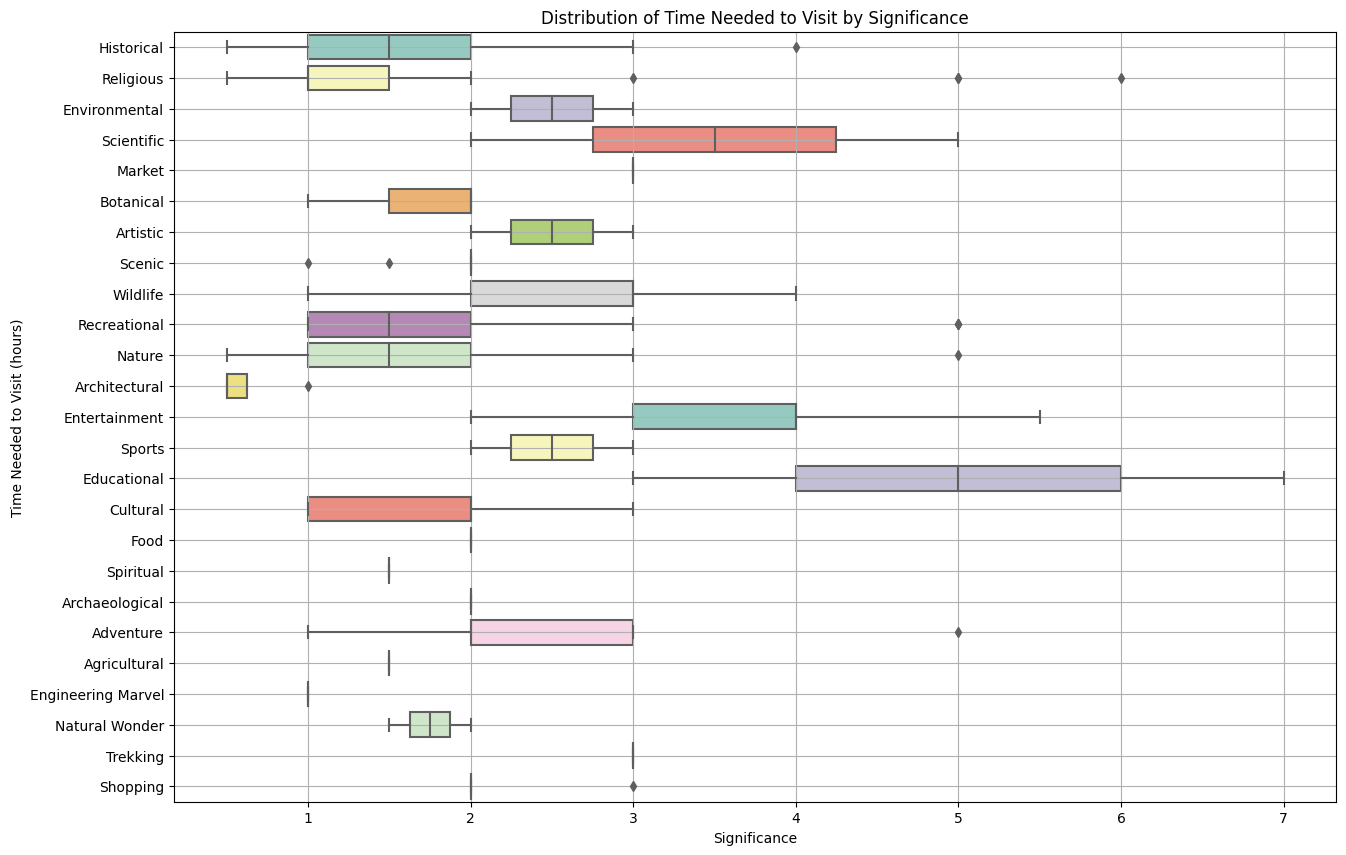

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='time needed to visit in hrs', y='Significance', data=data, palette='Set3')
plt.title("Distribution of Time Needed to Visit by Significance")
plt.xlabel('Significance')
plt.ylabel('Time Needed to Visit (hours)')
plt.grid(True)
plt.show()

**6. Which state has the most google ratings?**

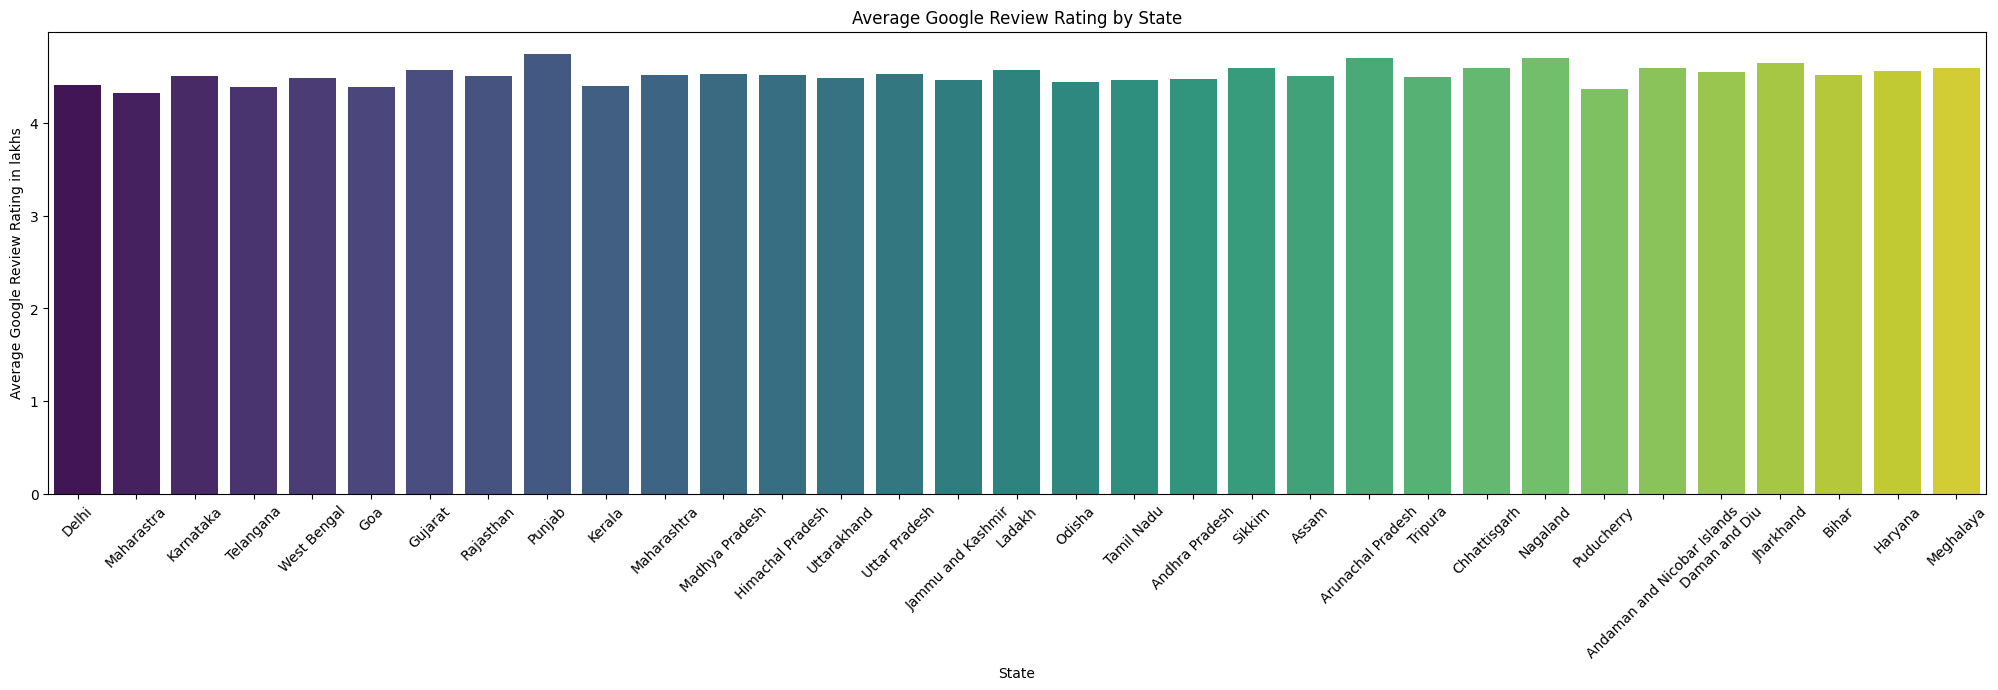

In [13]:
plt.figure(figsize=(25, 6))
sns.barplot(x='State', y='Google review rating', data=data, errorbar=None, palette='viridis')
plt.title('Average Google Review Rating by State')
plt.xlabel('State')
plt.ylabel('Average Google Review Rating in lakhs')
plt.xticks(rotation=45)
plt.show()

**7. What are the top 10 establishment types?**

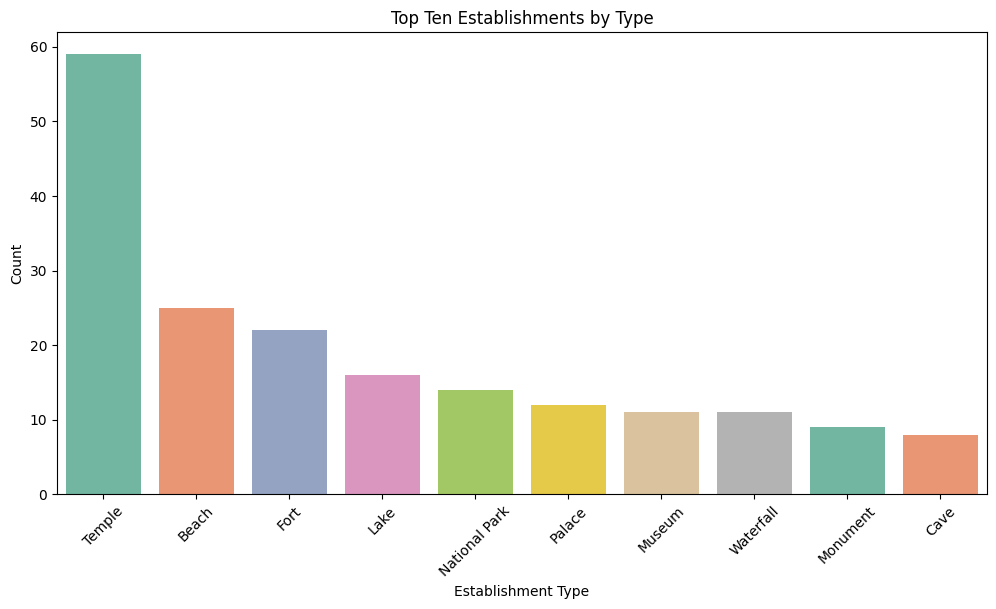

In [15]:
top_types = data['Type'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=data[data['Type'].isin(top_types)], order=top_types, palette='Set2')
plt.title('Top Ten Establishments by Type')
plt.xlabel('Establishment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()